# Funathon 2023 - Sujet 3 : Habitudes alimentaires à partir des données INCA

Site : https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/

Documentation : https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20210128-192017/notice-utilisateurs-donnees-inca3-data.gouvjanv21.pdf

## Imports

### Packages

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [133]:
pd.set_option('display.max_columns', None)

### Données

#### Table descriptive des individus (page 19)

Cette table contient les données des questionnaires face-à-face relatifs aux volets « Socio-économique » et « Mesures anthropométriques » et des données des
questionnaires auto-administrés relatifs aux volets « Etat de santé » et « Tabagisme ». Elle inclut également les différentes variables de pondération, les variables nécessaires à la déclaration du plan de sondage complexe de l’étude ainsi que les variables relatives à la sous ou sur-déclaration en termes de consommations alimentaires.

Elle regroupe les informations suivantes : caractéristiques socio-démographiques de l’individu (ou de son représentant dans le cas des enfants), caractéristiques
socio-démographiques de la personne de référence du foyer, niveau de vie du foyer, insécurité alimentaire, caractéristiques anthropométriques (poids, taille, indice de masse corporelle, statut pondéral) ; statut vis-à-vis d’allergies ou d’intolérances alimentaires, types de régimes alimentaires, types d’allergies ou d’intolérances alimentaires, régimes et histoire pondérale, statut vis-à-vis de la grossesse, de l’allaitement et de la ménopause (uniquement pour les femmes de 15 ans et plus), statut tabagique ; indicateurs de sous ou sur-déclaration en termes de consommations alimentaires.

In [134]:
description_indiv = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/f982ee4a-b2db-4608-ab95-bfe51dfc4897",
                            sep=";"
                            ).infer_objects()
print(f'{len(description_indiv)} lignes et {len(description_indiv.columns)} colonnes')
description_indiv.head(3)

5855 lignes et 185 colonnes


/tmp/ipykernel_273/1165284950.py:1: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  description_indiv = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/f982ee4a-b2db-4608-ab95-bfe51dfc4897",


,NOMEN,NOIND,ech,enf_allaite,pop1,pop2,pop3,pond_indiv_adu_pop1,pond_indiv_enf_pop1,pond_indiv_adu_pop2,pond_indiv_enf_pop2,pond_indiv_adu_pop3,pond_indiv_enf_pop3,pond_men_pop1,pond_men_pop2,zae,strate,fpc1,fpc2,fpc3,saison_pop1,saison_pop2,saison_pop3,region_adm_12cl,region_inca3,agglo_5cl,sex_PS,tage_PS,tage_PS_mois,lien_rep_enf,diplome_interv,etude_4cl_interv,situ_prof_5cl_interv,atrav_interv,trav_nuit_interv,trav_nuit_2cl_interv,PCS_8cl_interv,PCS_4cl_interv,tps_travail_interv,vacances_interv,interv_PR,sex_PR,tage_PR,lien_interv_PR,lien_PS_PR,diplome_PR,etude_4cl_PR,atrav_PR,PCS_8cl_PR,PCS_4cl_PR,tps_travail_PR,stat_log_2cl,soins,situ_fin_3cl,revenu,RUC_4cl,nbpers,nbadu,nbenf,situ_alim_statut,IA_statut,IA_score,taille_m,taille_d,taille,poids_m,poids_d,poids,imc,statnut,maladie_allergie_alim,intoall_confirm_med,regime_vegetarien,regime_allergie,regime_maigrir_med,regime_maigrir_choix,regime_autre_med,regime_raisonmed_libelle,regime_poidsstable,regime_forme,regime_autreraison,regime_non,veget_viande,veget_prodmer,veget_prodlait,veget_oeuf,veget_miel,veget_autre_alim,veget_autre_alim_libelle,allergie_laitvache,allergie_prepainfsoja,allergie_prepainfamande,allergie_gluten,allergie_farineble,allergie_lupin,allergie_arachide,allergie_fruitcoque,allergie_fruitcoque_libelle,allergie_oeuf,allergie_poisson,allergie_crustace,allergie_mollusque,allergie_soja,allergie_sesame,allergie_moutarde,allergie_sulfite,allergie_celeri,allergie_autres_fruitleg,allergie_autres_fl_libelle,allergie_autresalim,allergie_autresalim_libelle,allergie_nondetermine,allergie_fruits,allergie_legumes,regime_passe,regime_nb_2dernann,regime_nb_anter2dernann,regime_type,regime_type_libelle,regime_duree_sem,regime_duree_mois,regime_duree_nsp,poids_anndern,poids_anndern_nsp,poids_modif,poids_modifalim,poids_plusAP,poids_medicaments,poids_substituts,poids_chirurgie,poids_modifalim_laityaourt,poids_modifalim_fromage,poids_modifalim_mg,poids_modifalim_fruit,poids_modifalim_legume,poids_modifalim_pdtfeculent,poids_modifalim_pizza,poids_modifalim_pain,poids_modifalim_vrouge,poids_modifalim_volaille,poids_modifalim_oeuf,poids_modifalim_gateau,poids_modifalim_edulcorant,poids_modifalim_pdtsalleges,poids_modifalim_BS,poids_modifalim_eau,poids_modifalim_autre,poids_modifalim_autre_libelle,poids_perception,poidsmax,poidsmax_nsp,age_poidsmax,age_poidsmax_nsp,poidsmin,poidsmin_nsp,age_poidsmin,age_poidsmin_nsp,nb_prise_10kg,menopause,enceinte,enceinte_nbmois,allaite,allaite_nbsem,enceinte_12dermois,fume,nb_cigarettes_jour,nb_cigarettes_sem,nb_cigarettes_nsp,nb_cigares_jour,nb_cigares_sem,nb_cigares_nsp,nb_pipes_jour,nb_pipes_sem,nb_pipes_nsp,fume_age_debut,fume_age_debut_nsp,fume_age_arret,fume_age_arret_nsp,bmr_kcal,sousest0,surest0,sousest1,sousest3,sousext,surext
0,1101001,110100101,1,NaN,1,1,1,11415.498010,NaN,18553.734263,NaN,20743.8570,NaN,397.378201,561.623547,Z01091,6,0.038265,0.166111,0.333333,1,1.0,1.0,9,6,1,1,7,NaN,NaN,7.0,1,3,2.0,NaN,NaN,8,4,NaN,2,0,1,2,2.0,2.0,7.0,1,NaN,2,1,1.0,2,2,2,12,3.0,4,3,1,1,0,NaN,168.0,NaN,168.0,51.6,NaN,51.599998,18.282312,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1378.0930,0.0,0.0,0.0,NaN,0.0,0.0
1,1101007,110100701,1,NaN,1,1,1,4644.245013,NaN,4656.461407,NaN,6559.1914,NaN,1561.796163,1678.940922,Z01091,6,0.038265,0.166111,0.500000,1,1.0,1.0,9,6,1,2,8,NaN,NaN,7.0,1,1,NaN,4.0,2.0,1,1,2.0,1,0,1,2,1.0,1.0,7.0,1,1.0,7,4,1.0,1,2,1,11,4.0,2,2,0,1,0,NaN,166.0,NaN,166.0,65.1,NaN,65.099998,23.624619,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0

#### Tables relatives aux habitudes des individus ou des ménages

##### Table HABITUDES_INDIV (page 27)

Cette table contient les données des questionnaires auto-administrés relatifs aux volets « Habitudes alimentaires » et « Origine des aliments ».

Elle regroupe les informations suivantes : lieux et occasions de consommation, consommations hors-foyer et entre les repas, préférences alimentaires, présence de
sel/beurre/sauce sur la table au moment des repas, lecture des étiquettes, sources d’informations en alimentation, consommation de denrées animales crues et des
croûtes de fromage, préparation des fruits et légumes crus, spécificités de l’alimentation des enfants de 0 à 35 mois (ex : allaitement (exclusif ou partiel), type de laits consommés, diversification alimentaire, matériaux des biberons et des tétines, préparation, stockage et conservation des biberons de lait, mode de chauffage des laits et contenants utilisés), autoconsommation et utilisation de produits phytosanitaires au potager, consommation d’aliments issus de l’agriculture biologique et cuisson des aliments au barbecue.

In [135]:
habitudes_indiv = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/099351b9-e32e-4e38-8f23-dec21fd07c71",
                            sep=";"
                            ).infer_objects()
print(f'{len(habitudes_indiv)} lignes et {len(habitudes_indiv.columns)} colonnes')
habitudes_indiv.head(3)

/tmp/ipykernel_273/2727529822.py:1: DtypeWarning: Columns (8,14,16,36,45,60,61,62,63,195) have mixed types. Specify dtype option on import or set low_memory=False.
  habitudes_indiv = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/099351b9-e32e-4e38-8f23-dec21fd07c71",


4372 lignes et 389 colonnes


,POPULATION,NOIND,periode_reference,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfantmidi_autre_libelle,repasenfant_freq,conso_bebe_sein,lait_plussouvent,lait_plusvt_li_autr_anim_libelle,lait_plusvt_pi_autre_veg_libelle,lait_plusvt_boisson_veg_libelle,lait_plusvt_autre_anim_libelle,lait_plusvt_autre_libelle,lait_occ_laitmaternel,lait_occ_lait_1e_age,lait_occ_lait_2e_age,lait_occ_lait_croissance,lait_occ_li_autre_anim,lait_occ_li_autre_anim_libelle,lait_occ_li1e_age_protsoja,lait_occ_li2e_age_protsoja,lait_occ_soja_croissance,lait_occ_li1e_age_protriz,lait_occ_li2e_age_protriz,lait_occ_riz_croissance,lait_occ_pi_autre_veg,lait_occ_pi_autre_veg_libelle,lait_occ_boisson_lait_bebe,lait_occ_lait_regime_infantile,lait_occ_lait_vache,lait_occ_boisson_soja,lait_occ_boisson_veg,lait_occ_boisson_veg_libelle,lait_occ_autre_anim,lait_occ_autre_anim_libelle,lait_occ_autre,lait_occ_autre_libelle,lait_occ_aucun,lait_occ_nsp,etablissement_scolaire,lieu_repas_midi,lieu_repas_midi_autre_libelle,cantine_freq,cantine_jms_persfoyer,cantine_jms_veutpas,cantine_jms_probsante,cantine_jms_repaspasequilibre,cantine_jms_repaspasqualite,cantine_jms_repaschers,cantine_jms_ecoleproche,cantine_jms_paspropose,cantine_jms_pasaime,cantine_jms_autre_raison,cantine_jms_autre_raison_libelle,cantine_jms_nsp,collation_freq,collation_aliment1,collation_aliment2,collation_aliment3,collation_aliment4,collation_matin_freq,collation_matin_ecole_freq,collation_matin_pasecole_freq,collation_matin_aliment1,collation_matin_aliment2,collation_matin_aliment3,collation_matin_aliment4,distributeur_freq,distributeur_biscuits_sales,distributeur_biscuits_sucres,distributeur_barres_choco,distributeur_confiseries,distributeur_fruits_frais,distributeur_jus_de_fruits,distributeur_boissons_energ,distributeur_sodas,distributeur_eaux,distributeur_autre,distributeur_autre_libelle,distributeur_nsp,restaurationrapide_freq,aime_legumes,aime_viande,aime_fruits,aime_glaces,aime_fromage,aime_poisson,aime_soda,aime_lait,aime_yaourts,aime_jus_de_fruits,table_beurre,table_creme_fraiche,table_huile_olive,table_vinaigrette,table_mayonnaise,table_ketchup,table_sauce_soja,table_sel,etiquette_freq,etiquette_ingredients,etiquette_contenu_nutri,etiquette_portions,etiquette_message_nutri,etiquette_effets_benefiques,source_medecins,source_personnels_pharma,source_publicite,source_emissions_info,source_journaux,source_livres,source_professeurs,source_famille,source_amis,source_internet,source_emballages,source_autre,source_autre_libelle,conso_lardons_crus,conso_saucisses_crues,conso_viande_boeuf_crue,conso_viande_cheval_crue,conso_viande_porc_crue,conso_viande_volaille_crue,conso_poisson_cru,conso_mollusques_crus,conso_oeufs_crus,conso_croute_fleurie,conso_croute_lavee,conso_pate_pressee_non_cuite,conso_pate_pressee_cuite,conso_pate_persillee,pomme_crue_lave,pomme_crue_essuie,pomme_crue_epluche,pomme_crue_rien,pomme_crue_mange_pas,peche_crue_lave,peche_crue_essuie,peche_crue_epluche,peche_crue_rien,peche_crue_mange_pas,raisin_cru_lave,raisin_cru_essuie,raisin_cru_epluche,raisin_cru_rien,raisin_cru_mange_pas,fraise_crue_lave,fraise_crue_essuie,fraise_crue_epluche,fraise_crue_rien,fraise_crue_mange_pas,tomate_crue_lave,tomate_crue_essuie,tomate_crue_epluche,tomate_crue_rien,tomate_crue_mange_pas,champignon_cru_lave,champignon_cru_essuie,champignon_cru_epluche,champignon_cru_rien,champignon_cru_mange_pas,salade_crue_lave,salade_crue_essuie,salade_crue_epluche,salade_crue_rien,salade_crue_mange_pas,concombre_cru_lave,concombre_cru_essuie,concombre_cru_epluche,concombre_cru_rien,concombre_cru_mange_pas,utilisation_bib,bib_plastique,bib_verre,bib_nsp,sterilisation_bib,sterilisation_bib_libelle,tetine_caoutchouc,tetine_silicone,tetine_nsp,sterilisation_tetine,sterilisation_tetine_libelle,bib_lm,bib_li,bib_lc,bib_bl,bib_ppl,bib_eau,bib_jus,bib_autre,bib_autre_libelle,stockage_bib_lm,delai_conso_bib_lm,prepa_bib_li,conserv_eau,conserv_eau_libelle,

##### Table HABITUDES_MEN (page 41)

Cette table contient les données des questionnaires auto-administrés relatifs aux volets « Préparation des aliments », « Conservations des aliments » et « Traitement
de l’eau ».

Elle regroupe les informations suivantes : préparation des fruits et légumes cuits, matériaux des ustensiles utilisés pour la cuisson et le réchauffage des aliments ou boissons, critères de choix des aliments, lieux d’achat des aliments, durées de conservation des aliments non-pré-emballés et des restes alimentaires, respect des dates limite de consommation (DLC), types d’eaux utilisées, traitements de l’eau du robinet au domicile et les raisons du traitement de l’eau.

In [136]:
habitudes_men = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/c88bf218-dcda-4f7a-b35a-eb6dc0fc5060",
                            sep=";"
                            ).infer_objects()
print(f'{len(habitudes_men)} lignes et {len(habitudes_men.columns)} colonnes')
habitudes_men.head(3)

4372 lignes et 167 colonnes


/tmp/ipykernel_273/1886911487.py:1: DtypeWarning: Columns (55,158) have mixed types. Specify dtype option on import or set low_memory=False.
  habitudes_men = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/c88bf218-dcda-4f7a-b35a-eb6dc0fc5060",


,POPULATION,NOMEN,pomme_cuite_lave,pomme_cuite_essuie,pomme_cuite_epluche,pomme_cuite_rien,pomme_cuite_cuisine_pas,peche_cuite_lave,peche_cuite_essuie,peche_cuite_epluche,peche_cuite_rien,peche_cuite_cuisine_pas,raisin_cuit_lave,raisin_cuit_essuie,raisin_cuit_epluche,raisin_cuit_rien,raisin_cuit_cuisine_pas,fraise_cuite_lave,fraise_cuite_essuie,fraise_cuite_epluche,fraise_cuite_rien,fraise_cuite_cuisine_pas,tomate_cuite_lave,tomate_cuite_essuie,tomate_cuite_epluche,tomate_cuite_rien,tomate_cuite_cuisine_pas,champignon_cuit_lave,champignon_cuit_essuie,champignon_cuit_epluche,champignon_cuit_rien,champignon_cuit_cuisine_pas,chou_cuit_lave,chou_cuit_essuie,chou_cuit_epluche,chou_cuit_rien,chou_cuit_cuisine_pas,concombre_cuit_lave,concombre_cuit_essuie,concombre_cuit_epluche,concombre_cuit_rien,concombre_cuit_cuisine_pas,recip_cuisson_inox,recip_cuisson_alu,recip_cuisson_metal,recip_cuisson_ceramique,recip_cuisson_fonte,recip_cuisson_antiadhesif,recip_cuisson_autre,recip_cuisson_autre_libelle,recip_cuisson_nsp,four_ondes,four_ondes_vaisselle_maison,four_ondes_vaiss_maison_libelle,four_ondes_vaisselle,four_ondes_vaiss_libelle,choix_aliment_origine,choix_aliment_prix,choix_aliment_offres_promo,choix_aliment_habitude,choix_aliment_marque,choix_aliment_facilite_prepa,choix_aliment_apparence,choix_aliment_mode_prod,choix_aliment_gout,choix_aliment_prod_nouveau,choix_aliment_pub,choix_aliment_signe_quali,choix_aliment_compo_nutri,choix_aliment_ingredients,choix_aliment_raison_sante,choix_aliment_autres_infos,choix_prod_identiques,lieu_achat_fruits_frais,lieu_achat_legumes_frais,lieu_achat_pain,lieu_achat_patisseries,lieu_achat_viandes,lieu_achat_poissons_frais,suivi_instruction_conserv,refroidit_viandes,refroidit_quiches,refroidit_legumes,refroidit_soupes,refroidit_feculents,refroidit_cremesdessert,refroidit_patisseries,fin_conso_platmaison,conso_dlc_jambon,conso_dlc_saumon,conso_dlc_platscuisines,conso_dlc_viandepreemballee,conso_dlc_beurre,conso_apresachat_jamboncoupe,conso_apresachat_autrecharcut,conso_apresachat_platscuisines,conso_apresachat_entreesfroides,conso_apresachat_fromagecoupe,conso_apresachat_viande,temp_frigo,partie_froide_frigo,eaupuits_utilisation,eaupuits_boisson,eaupuits_prepa_repas,eaupuits_arr_jardin,eaupuits_arr_potager,eaupuits_piscine,eaupuits_toilette,eaupuits_wc,eaupuits_lave_linge,eaupuits_boisson_animaux,eaupuits_nettoyage,eaupuits_rien,eaupuits_autre,eaupuits_autre_libelle,eaupuits_nsp,eaupuits_conso_enfant,eaupuits_traitement,eaurobinet,eaurobinet_conso,eaurobinet_traitement,eaurobinet_trait_circeau,eaurobinet_trait_toutcirc,eaurobinet_trait_ptusage,eaurobinet_trait_ptconso,eaurobinet_trait_nsp,trait_carafe,trait_carafe_marque_libelle,trait_carafe_gout,trait_carafe_contaminant,trait_carafe_bacteries,trait_carafe_entartrage,trait_adoucisseur,trait_adoucisseur_gout,trait_adoucisseur_contaminant,trait_adoucisseur_bacteries,trait_adoucisseur_entartrage,trait_cartouche,trait_cartouche_gout,trait_cartouche_contaminant,trait_cartouche_bacteries,trait_cartouche_entartrage,trait_ultraviolet,trait_ultraviolet_gout,trait_ultraviolet_contaminant,trait_ultraviolet_bacteries,trait_ultraviolet_entartrage,trait_cart_refrig,trait_cart_refrig_gout,trait_cart_refrig_contaminant,trait_cart_refrig_bacteries,trait_cart_refrig_entartrage,trait_osmoseur,trait_osmoseur_gout,trait_osmoseur_contaminant,trait_osmoseur_bacteries,trait_osmoseur_entartrage,trait_autre,trait_autre_libelle,trait_autre_gout,trait_autre_contaminant,trait_autre_bacteries,trait_autre_entartrage,trait_nsp,eau_boisson,bouilloire_elec,bouilloire_elec_type
0,Pop2 Ménage,1101001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,NaN,5.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,6.0,

##### Table ACTPHYS_SEDENT (page 48)

Cette table contient les données des questionnaires auto-administrés (pour les adultes 18-79 ans) et face-à-face (pour les enfants 3-17 ans) relatifs au volet
« Sédentarité, activité physique et loisirs ». Il n’y a pas de données relatives à cette thématique pour les enfants de 0-35 mois.

Elle regroupe les informations suivantes : mode de transport du trajet domicile-travail, temps passé devant les écrans (télévision, jeux vidéo, ordinateur) pendant la semaine et le week-end, pratique et fréquence d’une activité physique (y compris dans le cadre scolaire), type d’activité physique pratiquée, niveau d’activité physique, niveau de sédentarité et profils d’activité physique.

In [137]:
actphys_sedent = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e9a34b81-2105-4d82-a023-c14947fb2b2c",
                            sep=";"
                            ).infer_objects()
print(f'{len(actphys_sedent)} lignes et {len(actphys_sedent.columns)} colonnes')
actphys_sedent.head(3)

4725 lignes et 93 colonnes


,POPULATION,NOIND,transport_personnel,transport_ecole,tv_score,tv_duree,jvideo_score,jvideo_duree,ordi_score,ordi_duree,jeux_pleinair_nbjours,enfant_actif,eps_ouinon,eps_nbjours,eps_duree,club_nbjours,club_nb,activite_musculation_nbjours,activite_moderee_nbjours,activite_intense_nbjours,escalier_score,emploi_4sem,travail_freq_semaine,travail_duree,travail_score,transport_voiture_score,transport_public_score,transport_velo_score,transport_pied_score,transport_score,activite_balayer_score,activite_nettoyer_score,activite_aspirateur_score,activite_repasser_score,activite_vaisselle_score,activite_lessive_score,activite_jardiner_score,activite_tondre_score,activite_arroser_score,activite_becher_score,activite_bricoler_score,activite_marche_score,activite_piscine_score,activite_velo_score,activite_roller_score,activite_danse_salon_score,activite_bowling_score,activite_billard_score,activite_peche_score,activite_chasse_score,activite_loisirs_assis_score,activite_loisirs_debout_score,activite_randonnee_score,activite_jogging_score,activite_natation_score,activite_yoga_score,activite_rameur_score,activite_aerobic_score,activite_danse_moderne_score,activite_cyclisme_score,activite_tennis_score,activite_boxe_score,activite_escrime_score,activite_haltere_score,activite_athletisme_score,activite_ski_score,activite_voile_score,activite_canoe_score,activite_equitation_score,activite_golf_score,activite_tir_score,activite_moto_score,activite_musique_score,activite_ping_pong_score,activite_gym_score,activite_escalade_score,activite_alpinisme_score,activite_foot_score,activite_rugby_score,activite_basket_score,activite_hand_score,activite_volley_score,activite_hockey_score,activite_domloissport_duree,activite_domloissport_score,activite_moderee_score,activite_intense_score,activite_total_duree,activite_total_score,nap,profil_activite,sedentarite,sedentarite_duree
0,Pop1 Individu,120100401,NaN,1.0,NaN,1.642857,NaN,0.000000,NaN,0.000000,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
1,Pop1 Individu,120100501,NaN,1.0,NaN,0.821429,NaN,0.964286,NaN,0.571429,NaN,NaN,NaN,2.0,3.0,NaN,2.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN
2,Pop1 Individu,120100601,NaN,3.0,NaN,1.142857,NaN,0.000000,NaN,0.571429,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN


##### Table FPQ (page 52)

Cette table contient les données des questionnaires auto-administrés relatifs au volet « Fréquentiel alimentaire ». Ce questionnaire n’était proposé qu’aux enfants ayant démarré la diversification alimentaire (ainsi 30 enfants de 0-35 mois n’y ont pas répondu).

Elle regroupe les informations suivantes : consommation (oui/non) pour environ une soixantaine d’aliments ou groupes d’aliments, puis si oui, fréquence de
consommation.

In [278]:
fpq = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/32e79499-9897-423b-acd6-143121340f86",
                            sep=";"
                            ).infer_objects()
print(f'{len(fpq)} lignes et {len(fpq.columns)} colonnes')
fpq.head(3)

4339 lignes et 384 colonnes


,POPULATION,NOIND,PC_pain_ON,PC_pain_freq_M,PC_paincomplet_ON,PC_paincomplet_freq_M,PC_cereales_pdj_complet_ON,PC_cereales_pdj_complet_freq_M,PC_cereales_pdj_autre_ON,PC_cereales_pdj_autre_freq_M,RP_riz_tot_ON,RP_riz_tot_freq_M,RP_riz_complet_ON,RP_riz_complet_freq_M,RP_pdt_tot_ON,RP_pdt_tot_freq_M,RP_pdt_frites_ON,RP_pdt_frites_freq_M,RP_legumeracine_ON,RP_legumeracine_freq_M,RP_tubercule_ON,RP_tubercule_freq_M,LEG_tot_ON,LEG_tot_freq_M,LEG_salade_ON,LEG_salade_freq_M,LEG_bettera_tot_ON,LEG_bettera_tot_freq_M,LEG_bettera_carot_ON,LEG_bettera_carot_freq_M,LEG_concombre_ON,LEG_concombre_freq_M,LEG_concombre_printété_ON,LEG_concombre_printété_freq_M,LEG_concombre_automhiv_ON,LEG_concombre_automhiv_freq_M,LEG_tomate_tot_ON,LEG_tomate_tot_freq_M,LEG_tomate_tot_printété_ON,LEG_tomate_tot_printété_freq_M,LEG_tomate_tot_automhiv_ON,LEG_tomate_tot_automhiv_freq_M,LEG_tomate_seul_ON,LEG_tomate_seul_freq_M,LEG_tomate_seul_printété_ON,LEG_tomate_seul_printété_freq_M,LEG_tomate_seul_automhiv_ON,LEG_tomate_seul_automhiv_freq_M,LEG_chou_ON,LEG_chou_freq_M,LEG_artichaut_ON,LEG_artichaut_freq_M,LEG_champignon_ON,LEG_champignon_freq_M,LEG_oignon_ON,LEG_oignon_freq_M,LEG_legsecs_ON,LEG_legsecs_freq_M,LEG_soupe_ON,LEG_soupe_freq_M,LEG_soupe_automhiv_ON,LEG_soupe_automhiv_freq_M,LEG_soupe_printété_ON,LEG_soupe_printété_freq_M,LEG_saucetomate_ON,LEG_saucetomate_freq_M,VC_tot_ON,VC_tot_freq_M,VC_boeuf_ON,VC_boeuf_freq_M,VC_agneau_ON,VC_agneau_freq_M,VC_poulet_ON,VC_poulet_freq_M,VC_lapin_ON,VC_lapin_freq_M,VC_porc_ON,VC_porc_freq_M,VC_saucisson_ON,VC_saucisson_freq_M,VC_pate_foie_ON,VC_pate_foie_freq_M,VC_pate_autre_ON,VC_pate_autre_freq_M,VC_foie_ON,VC_foie_freq_M,PPM_tot_ON,PPM_tot_freq_M,PPM_poissgras_tot_ON,PPM_poissgras_tot_freq_M,PPM_poissgras_thon_ON,PPM_poissgras_thon_freq_M,PPM_poissonautre_ON,PPM_poissonautre_freq_M,PPM_surimi_ON,PPM_surimi_freq_M,PPM_crustace_ON,PPM_crustace_freq_M,PPM_mollusque_ON,PPM_mollusque_freq_M,OE_oeuf_ON,OE_oeuf_freq_M,OE_quiche_ON,OE_quiche_freq_M,SOJ_soja_ON,SOJ_soja_freq_M,PL_lait_ON,PL_lait_freq_M,PL_fromage_tot_ON,PL_fromage_tot_freq_M,PL_fromage_laitcru_ON,PL_fromage_laitcru_freq_M,PL_yaourtentremet_ON,PL_yaourtentremet_freq_M,PL_yaourt_tot_ON,PL_yaourt_tot_freq_M,PL_yaourt_arom_ON,PL_yaourt_arom_freq_M,PL_entremet_ON,PL_entremet_freq_M,PL_yaourtentremet_light_ON,PL_yaourtentremet_light_freq_M,PL_glace_ON,PL_glace_freq_M,PL_glace_ete_ON,PL_glace_ete_freq_M,PL_glace_autresaison_ON,PL_glace_autresaison_freq_M,FR_total_ON,FR_total_freq_M,FR_agrume_ON,FR_agrume_freq_M,FR_agrume_automhiv_ON,FR_agrume_automhiv_freq_M,FR_agrume_printété_ON,FR_agrume_printété_freq_M,FR_pomme_ON,FR_pomme_freq_M,FR_pomme_autresaison_ON,FR_pomme_autresaison_freq_M,FR_pomme_ete_ON,FR_pomme_ete_freq_M,FR_raisin_ON,FR_raisin_freq_M,FR_raisin_automne_ON,FR_raisin_automne_freq_M,FR_raisin_autresaison_ON,FR_raisin_autresaison_freq_M,FR_melon_ON,FR_melon_freq_M,FR_melon_ete_ON,FR_melon_ete_freq_M,FR_melon_autresaison_ON,FR_melon_autresaison_freq_M,FR_peche_ON,FR_peche_freq_M,FR_peche_ete_ON,FR_peche_ete_freq_M,FR_peche_autresaison_ON,FR_peche_autresaison_freq_M,FR_fraise_ON,FR_fraise_freq_M,FR_fraise_printété_ON,FR_fraise_printété_freq_M,FR_fraise_automhiv_ON,FR_fraise_automhiv_freq_M,FR_fruitexotique_ON,FR_fruitexotique_freq_M,BIS_biscuit_ON,BIS_biscuit_freq_M,BIS_viennoiserie_ON,BIS_viennoiserie_freq_M,BIS_chocolat_ON,BIS_chocolat_freq_M,BIS_bonbon_tot_ON,BIS_bonbon_tot_freq_M,BIS_bonbon_sanssucre_ON,BIS_bonbon_sanssucre_freq_M,BIS_cacahuete_ON,BIS_cacahuete_freq_M,BIS_chips_ON,BIS_chips_freq_M,BNA_jus_tot_ON,BNA_jus_tot_freq_M,BNA_jus_raisin_ON,BNA_jus_raisin_freq_M,BNA_sodaredbull_ON,BNA_sodaredbull_freq_M,BNA_soda_ON,BNA_soda_freq_M,BNA_redbull_ON,BNA_redbull_freq_M,BNA_sodaredbull_light_ON,BNA_sodaredbull_light_freq_M,BA_vin_ON,BA_vin_freq_M,BA_cidre_ON,BA_cidre_freq_M,BA_biere_ON,BA_biere_freq_M,BA_aperitif_ON,BA_aperitif_freq_M,PC_cereales_bb_ON,PC_cereales_bb_freq_M,RP_riz_tot_bb_ON,RP_riz_tot_bb_freq_M,RP_riz_tot_maison_ON,RP_riz_

#### Tables relatives aux consommations alimentaires

##### Table OCCASIONS (page 66)

Cette table contient les données relatives aux journées et occasions de consommation recueillies par les 2 ou 3 jours de rappels de 24 heures pour les 4 114 individus de Pop3.

Elle regroupe les informations suivantes : type de jour de consommation (ex : semaine vs week-end), prise ou non d’une occasion de consommation, type d’occasion
de consommation et lieu de consommation.

In [139]:
occasions = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/76881e8e-e07c-44b6-915c-3a2b5cee4e0c",
                            sep=";"
                            ).infer_objects()
print(f'{len(occasions)} lignes et {len(occasions.columns)} colonnes')
occasions.head(3)

131097 lignes et 13 colonnes


/tmp/ipykernel_273/2949714519.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  occasions = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/76881e8e-e07c-44b6-915c-3a2b5cee4e0c",


,POPULATION,NOIND,R24_num,R24_jour,R24_nombre,sem_we,sem_we_ferie,occ_ouinon,occ_hdeb,occ_type,occ_lieu,occ_lieu_autre_libelle,occ_lieu_dom_hors_dom
0,Pop3,110100101,1,3,3,1,1,0,NaN,1,NaN,NaN,NaN
1,Pop3,110100101,1,3,3,1,1,0,NaN,2,NaN,NaN,NaN
2,Pop3,110100101,1,3,3,1,1,0,NaN,3,NaN,NaN,NaN


##### Table NOMENCLATURE (page 68)

Cette table fournit la nomenclature des aliments déclarés pendant les 2 ou 3 jours de rappels de 24 heures pour les 4 114 individus de la population Pop3 selon 3
classifications différentes : INCA3, GloboDiet et FOODEX 2.

In [140]:
nomenclature = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/13550bb4-efd8-4e42-a913-35f3c93729d6",
                            sep=";"
                            ).infer_objects()
print(f'{len(nomenclature)} lignes et {len(nomenclature.columns)} colonnes')
nomenclature.head(3)

36734 lignes et 36 colonnes


/tmp/ipykernel_273/3222610936.py:1: DtypeWarning: Columns (11,17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  nomenclature = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/13550bb4-efd8-4e42-a913-35f3c93729d6",


,gpe_INCA3,aliment_code_INCA3,aliment_libelle_INCA3,aliment_synonyme_INCA3,aliment_libelle_INCA3_EN,gpe_GloboDiet,gpe_GloboDiet_EN,sgpe_GloboDiet,sgpe_GloboDiet_EN,ssgpe_GloboDiet,ssgpe_GloboDiet_EN,facette_01,facette_02,facette_03,facette_04,facette_05,facette_06,facette_07,facette_08,facette_09,facette_10,facette_13,facette_14,facette_19,facette_20,facette_25,facette_27,aliment_code_FX,aliment_libelle_FX,gpe_code_FX,gpe_libelle_FX,sgpe_code_FX,sgpe_libelle_FX,ssgpe_code_FX,ssgpe_libelle_FX,Freq
0,1,2641,biscotte au froment (classique),NaN,"rusk, wheaten",6,6,63,63,632.0,632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A006M#F10.A07XK,"Rusk, White/refined",A000J,Grains and grain-based products,A004V,Bread and similar products,A006M,Rusk,384
1,1,579,biscotte briochée,NaN,"rusk, brioche",6,6,63,63,632.0,632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A006M#F12.A008M,"Rusk, Fine yeast sweet dough (brioche)",A000J,Grains and grain-based products,A004V,Bread and similar products,A006M,Rusk,40
2,1,2638,biscotte minceur sans sel et sans sucre ajouté,NaN,"rusk, salt free and sugar free",6,6,63,63,632.0,632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A006M#F10.A0CRG$F10.A0CQE$F10.A077K,"Rusk, Light,Without added salt,Without added s...",A000J,Grains and grain-based products,A004V,Bread and similar products,A006M,Rusk,2


##### Table CONSO_COMP_ALIM (page 70)

Cette table contient tous les actes de consommations (ou lignes de consommation) recueillis durant les 2 ou 3 jours de rappels de 24 heures pour les 4 114 individus de la population Pop3.

Elle fournit pour chaque ligne de consommation les informations suivantes : occasion et lieu de l’acte de consommation, description précise de l’aliment consommé
via les facettes, estimation de la quantité consommée via les variables qte_conso ou qte_conso_pond (quantitée consommée pondérée par la variable R24_pond
pour tenir compte de la répartition semaine/week-end (férié compris)) et composition nutritionnelle associée à l’aliment déclaré.

In [141]:
conso_comp_alim = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e9a34b81-2105-4d82-a023-c14947fb2b2c",
                            sep=";"
                            ).infer_objects()
print(f'{len(conso_comp_alim)} lignes et {len(conso_comp_alim.columns)} colonnes')
conso_comp_alim.head(3)

4725 lignes et 93 colonnes


,POPULATION,NOIND,transport_personnel,transport_ecole,tv_score,tv_duree,jvideo_score,jvideo_duree,ordi_score,ordi_duree,jeux_pleinair_nbjours,enfant_actif,eps_ouinon,eps_nbjours,eps_duree,club_nbjours,club_nb,activite_musculation_nbjours,activite_moderee_nbjours,activite_intense_nbjours,escalier_score,emploi_4sem,travail_freq_semaine,travail_duree,travail_score,transport_voiture_score,transport_public_score,transport_velo_score,transport_pied_score,transport_score,activite_balayer_score,activite_nettoyer_score,activite_aspirateur_score,activite_repasser_score,activite_vaisselle_score,activite_lessive_score,activite_jardiner_score,activite_tondre_score,activite_arroser_score,activite_becher_score,activite_bricoler_score,activite_marche_score,activite_piscine_score,activite_velo_score,activite_roller_score,activite_danse_salon_score,activite_bowling_score,activite_billard_score,activite_peche_score,activite_chasse_score,activite_loisirs_assis_score,activite_loisirs_debout_score,activite_randonnee_score,activite_jogging_score,activite_natation_score,activite_yoga_score,activite_rameur_score,activite_aerobic_score,activite_danse_moderne_score,activite_cyclisme_score,activite_tennis_score,activite_boxe_score,activite_escrime_score,activite_haltere_score,activite_athletisme_score,activite_ski_score,activite_voile_score,activite_canoe_score,activite_equitation_score,activite_golf_score,activite_tir_score,activite_moto_score,activite_musique_score,activite_ping_pong_score,activite_gym_score,activite_escalade_score,activite_alpinisme_score,activite_foot_score,activite_rugby_score,activite_basket_score,activite_hand_score,activite_volley_score,activite_hockey_score,activite_domloissport_duree,activite_domloissport_score,activite_moderee_score,activite_intense_score,activite_total_duree,activite_total_score,nap,profil_activite,sedentarite,sedentarite_duree
0,Pop1 Individu,120100401,NaN,1.0,NaN,1.642857,NaN,0.000000,NaN,0.000000,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
1,Pop1 Individu,120100501,NaN,1.0,NaN,0.821429,NaN,0.964286,NaN,0.571429,NaN,NaN,NaN,2.0,3.0,NaN,2.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN
2,Pop1 Individu,120100601,NaN,3.0,NaN,1.142857,NaN,0.000000,NaN,0.571429,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN


##### Table CONSO_GPE_INCA3 (page 75)

Cette table fournit les consommations alimentaires individuelles journalières estimées pour chaque groupe de la nomenclature INCA3 à partir des consommations
observées sur 2 ou 3 jours de rappels de 24 heures pour les 4 114 individus de la Pop3.

In [142]:
conso_gpe_inca3 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/7f520c93-f0ef-4e77-b5a5-1e0ef5855ac7",
                            sep=";"
                            ).infer_objects()
print(f'{len(conso_gpe_inca3)} lignes et {len(conso_gpe_inca3.columns)} colonnes')
conso_gpe_inca3.head(3)

4114 lignes et 46 colonnes


,POPULATION,NOIND,conso_gpe1,conso_gpe2,conso_gpe3,conso_gpe4,conso_gpe5,conso_gpe6,conso_gpe7,conso_gpe8,conso_gpe9,conso_gpe10,conso_gpe11,conso_gpe12,conso_gpe13,conso_gpe14,conso_gpe15,conso_gpe16,conso_gpe17,conso_gpe18,conso_gpe19,conso_gpe20,conso_gpe21,conso_gpe22,conso_gpe23,conso_gpe24,conso_gpe25,conso_gpe26,conso_gpe27,conso_gpe28,conso_gpe29,conso_gpe30,conso_gpe31,conso_gpe32,conso_gpe33,conso_gpe34,conso_gpe35,conso_gpe36,conso_gpe37,conso_gpe38,conso_gpe39,conso_gpe40,conso_gpe41,conso_gpe42,conso_gpe43,conso_gpe44
0,Pop3,110100101,60.899998,0.0,6.666666,161.000000,0.0,41.333332,83.199997,208.33333,0.000000,0.000000,20.77,3.113333,7.133333,0.0,84.333336,49.728001,0.000000,0.0,0.0,0.0,42.166668,0.0,71.333336,84.580002,0.0,0.000000,34.133335,1.666667,0.00000,544.16669,148.97499,473.46664,0.000000,0.00000,0.00000,53.666668,0.0,0.000000,52.500000,35.333332,88.052261,0.0,0.0,0.0
1,Pop3,110100701,24.000000,0.0,0.000000,40.000000,0.0,49.714291,0.000000,205.35715,7.142857,76.785713,0.00,1.732143,1.428572,0.0,0.000000,0.000000,35.357143,0.0,0.0,0.0,234.600010,0.0,0.000000,279.177120,0.0,2.857143,11.428572,24.006596,0.00000,1027.14280,0.00000,0.00000,5.771429,947.45532,211.61903,0.000000,0.0,80.000008,0.000000,0.000000,3.821429,0.0,0.0,0.0
2,Pop3,110100801,70.349998,0.0,0.000000,78.571426,0.0,118.571420,130.742860,0.00000,13.928571,0.000000,0.00,30.000002,4.585714,0.0,33.482143,127.923430,14.285716,0.0,0.0,0.0,63.285717,0.0,38.214283,374.171420,0.0,0.000000,0.000000,0.000000,357.14285,535.71429,764.92725,0.00000,0.000000,0.00000,0.00000,0.000000,0.0,77.428581,89.285713,115.714290,0.000000,0.0,0.0,0.0


##### Table APPORTS_NUT_ALIM (page 78)

Cette table fournit les apports nutritionnels individuels journaliers estimés à partir des consommées observées sur 2 ou 3 jours de rappels de 24 heures pour les 4 114 individus de la Pop3, ainsi que la contribution à l’Apport Energétique Sans Alcool (AESA) pour les macronutriments et les apports pour 100 kcal pour les vitamines et minéraux.

In [143]:
apports_nut_alim = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e7f48716-368f-48e1-a7c3-ea0638b0d6a7",
                            sep=";"
                            ).infer_objects()
print(f'{len(apports_nut_alim)} lignes et {len(apports_nut_alim.columns)} colonnes')
apports_nut_alim.head(3)

4114 lignes et 108 colonnes


,POPULATION,NOIND,nutriment1,nutriment2,nutriment3,nutriment4,nutriment5,nutriment6,nutriment7,nutriment8,nutriment9,nutriment10,nutriment11,nutriment12,nutriment13,nutriment14,nutriment15,nutriment16,nutriment17,nutriment18,nutriment19,nutriment20,nutriment21,nutriment22,nutriment23,nutriment24,nutriment25,nutriment26,nutriment27,nutriment28,nutriment29,nutriment30,nutriment31,nutriment32,nutriment33,nutriment34,nutriment35,nutriment36,nutriment37,nutriment38,nutriment39,nutriment40,nutriment41,nutriment42,nutriment43,nutriment44,nutriment45,nutriment46,nutriment47,nutriment48,nutriment49,nutriment50,nutriment51,nutriment52,nutriment53,nutriment54,contrib3,contrib4,contrib5,contrib6,contrib7,contrib8,contrib9,contrib10,contrib11,contrib12,contrib13,contrib14,contrib15,contrib16,contrib17,contrib18,contrib19,contrib20,contrib21,contrib22,contrib23,contrib24,contrib25,contrib26,contrib27,contrib28,contrib29,contrib30,contrib31,contrib32,contrib33,contrib34,contrib35,contrib36,contrib37,contrib38,contrib39,contrib40,contrib41,contrib42,contrib43,contrib44,contrib45,contrib46,contrib47,contrib48,contrib49,contrib50,contrib51,contrib52,contrib53,contrib54
0,Pop3,110100101,2077.7625,2077.2795,83.054970,287.46045,145.453580,118.051110,0.272250,16.439404,8.017636,59.857983,23.060402,9.630586,3.926577,1.896557,1.542667,0.486201,0.350231,0.257823,0.347300,19.846571,16.708887,9.374581,6.994450,0.986838,93.711525,22.259314,37.282555,0.069020,1885.6274,2254.1074,5.631385,276.30396,1190.98180,3428.9727,642.88458,1.887744,9.020890,1.120552,11.340801,91.756401,108.766570,238.07478,1205.9960,1.418608,1.550223,19.654913,7.175137,2.295812,342.80103,4.486623,179.52852,2.204268,5.361895,26.322313,15.993027,55.332283,28.008476,22.731867,0.031455,1.582782,1.157904,25.934008,9.991126,4.172538,1.701225,0.821701,0.668374,0.210651,0.151741,0.111704,0.150471,8.598705,7.239275,4.061622,3.030408,0.427556,40.601360,9.644048,16.153002,0.023253,90.752792,108.512470,0.271094,13.301241,57.333729,165.07036,30.948391,0.090876,0.434265,0.053943,0.545945,4.417143,5.236011,11.460893,58.056507,0.068292,0.074628,0.946185,0.345410,0.110520,16.502401,0.215986,8.642483,0.106113,0.258121,1.267153
1,Pop3,110100701,1123.7395,1122.6108,42.008881,141.19160,87.729454,40.941555,1.554727,21.721514,6.391473,36.630997,15.765450,7.900550,3.444639,1.391335,0.493172,0.385506,0.424592,0.275569,0.178349,11.429717,8.687596,5.348072,3.592623,1.020967,42.056690,21.971771,27.163818,0.157663,3007.6116,1926.7247,4.869596,376.29398,859.44623,3080.8025,739.25482,3.007096,6.065968,1.491311,5.242436,86.358856,129.015460,145.10440,2556.5046,0.903329,1.630864,16.413980,3.561278,1.108337,338.44479,1.346285,278.22232,2.835608,8.070965,0.791500,14.968279,50.086712,31.259079,14.587977,0.332381,3.869821,1.708020,29.367165,12.639202,6.333891,2.761576,1.115437,0.395377,0.309061,0.340397,0.220924,0.142983,9.163234,6.964868,4.287563,2.880215,0.818512,33.716957,17.614826,21.777304,0.098211,267.643130,171.628910,0.433774,33.519539,76.557808,274.43192,65.851387,0.267866,0.540345,0.132843,0.466986,7.692680,11.492447,12.925619,227.728490,0.080467,0.145274,1.462126,0.317232,0.098729,30.148006,0.119924,24.783506,0.252590,0.718946,0.070505
2,Pop3,110100801,2544.5754,2543.0146,87.255280,292.85364,148.375690,123.386040,0.837265,20.448515,8.385115,106.429600,40.389889,22.887701,8.818711,2.514935,0.778940,0.600356,0.646122,0.428137,0.301820,42.819088,30.806162,14.336820,10.276208,1.478735,175.837230,33.275902,52.980053,0.508664,2508.0659,2462.5938,6.197465,245.47252,1217.98410,2753.3086,873.05585,1.947472,8.651539,1.167279,9.304115,84.394257,84.323669,227.64345,1084.1161,1.147997,1.284566,24.011118,5.458546,1.703424,297.71225,3.337443,160.53024,2.899170,8.458137,29.891497,13.724699,46.011333,23.338551,19.407837,0.079018,1.608211,0.989194,37.666569,14.294413,8.100202,3.121036,0.890062,0.275675,0.212473,0.228670,0.151522,0.106817,15.154132,10.902629,5.073953,3.636860,0.523340,62.230671,11.776696,18.750206,0.139931,98.5

#### Tables relatives aux compléments alimentaires

##### Table CONSO_CA_PROD (page 83)

Cette table contient les données des questionnaires face-à-face relatifs au volet « Consommation de compléments alimentaires » concernant la description des
compléments alimentaires (CA) consommés.

Elle regroupe les informations suivantes : catégorie de CA consommés et mode de consommation.

In [144]:
conso_ca_prod = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/90991f9a-0e54-40c4-a7cc-550d050d9360",
                            sep=";"
                            ).infer_objects()
print(f'{len(conso_ca_prod)} lignes et {len(conso_ca_prod.columns)} colonnes')
conso_ca_prod.head(3)

2380 lignes et 12 colonnes


,POPULATION,NOIND,periode_reference,num_ligne_CA,num_prod,type_prod,classif_reg_prod,classif_prod,pres_prod,nb_unit_prod,mode_conso_prod,nb_jours_an
0,Pop1 Individu,110300601,4,111,1,2,vitamines et minéraux,5.0,1.0,3.0,1,90.0
1,Pop1 Individu,110600401,4,131,1,2,vitamines et minéraux,5.0,1.0,3.0,1,14.0
2,Pop1 Individu,110601301,4,141,1,2,vitamines et minéraux,5.0,1.0,4.0,1,122.0


##### Table CONSO_CA_INDIV (page 85)

Cette table contient les données des questionnaires face-à-face relatifs au volet « Consommation de compléments alimentaires », concernant les consommateurs de
compléments alimentaires (CA).

Elle regroupe les informations suivantes : statut vis-à-vis de la consommation de compléments alimentaires selon 2 définitions, nombre de CA consommés et saison
de consommation de prédilection.

In [145]:
conso_ca_indiv = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/337316a1-a224-456a-97b2-341a6a152793",
                            sep=";"
                            ).infer_objects()
print(f'{len(conso_ca_indiv)} lignes et {len(conso_ca_indiv.columns)} colonnes')
conso_ca_indiv.head(3)

5855 lignes et 18 colonnes


,POPULATION,NOIND,periode_reference,conso_ca,conso_ca_regl,conso_ca_nb,conso_ca_regl_nb,indic_ca,indic_medic,indic_ni,saison_particuliere,saison_automne,saison_hiver,saison_printemps,saison_ete,saison_autre,saison_autre_libelle,saison_nsp
0,Pop1 Individu,110100101,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN
1,Pop1 Individu,110100701,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN
2,Pop1 Individu,110100801,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN


## Analyses exploratoires

### Clustering habitudes alimentaires

In [191]:
habitudes_indiv.shape

(4372, 389)

In [192]:
# Sélectionner les caractéristiques pour le clustering
habitudes_indiv_for_clustering = habitudes_indiv.drop(
    ['POPULATION', 'NOIND', 'periode_reference'],
    axis=1
).dropna(
    axis=1, how='all'
).select_dtypes(
    include=np.number
)
habitudes_indiv_for_clustering.shape

(4372, 340)

In [193]:
# Gérer les valeurs manquantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
habitudes_indiv_for_clustering_array = imputer.fit_transform(habitudes_indiv_for_clustering)

In [194]:
# Normaliser les colonnes
scaler = StandardScaler()
habitudes_indiv_for_clustering_array = scaler.fit_transform(habitudes_indiv_for_clustering_array)

In [195]:
# Détecter et retirer les outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=0)
outlier_labels = outlier_detector.fit_predict(habitudes_indiv_for_clustering_array)
habitudes_indiv_for_clustering_array = habitudes_indiv_for_clustering_array[outlier_labels == 1]
habitudes_indiv_for_clustering_array.shape

(4153, 340)

In [216]:
# Effectuer le clustering par K-moyennes
k = 3  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(habitudes_indiv_for_clustering_array)

/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [217]:
# Effectuer l'ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(habitudes_indiv_for_clustering_array)

# Obtenir les poids des caractéristiques pour chaque composante principale
pca_components = pd.DataFrame(np.abs(pca.components_), columns=habitudes_indiv_for_clustering.columns)

In [218]:
# Créer un dataframe pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

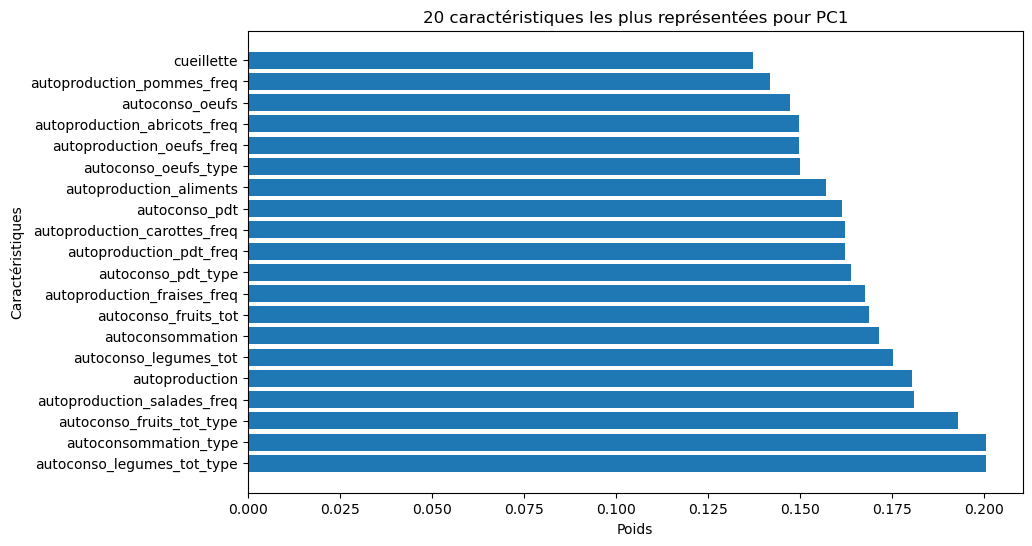

In [219]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC1
pc1_top_features = pca_components.iloc[0].nlargest(20)

# Afficher les poids des caractéristiques pour PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_top_features.index, pc1_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC1')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

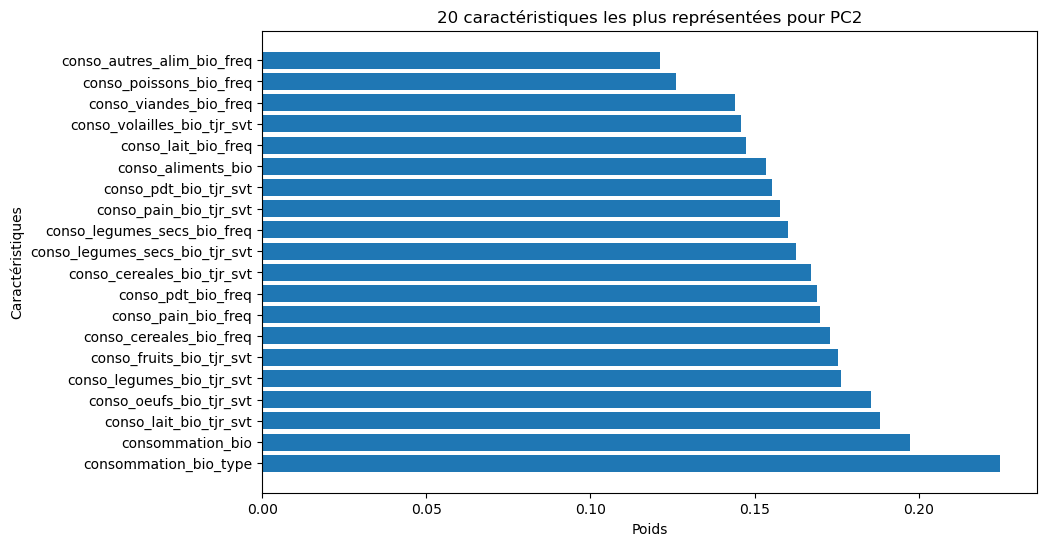

In [220]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC2
pc2_top_features = pca_components.iloc[1].nlargest(20)

# Afficher les poids des caractéristiques pour PC2
plt.figure(figsize=(10, 6))
plt.barh(pc2_top_features.index, pc2_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC2')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

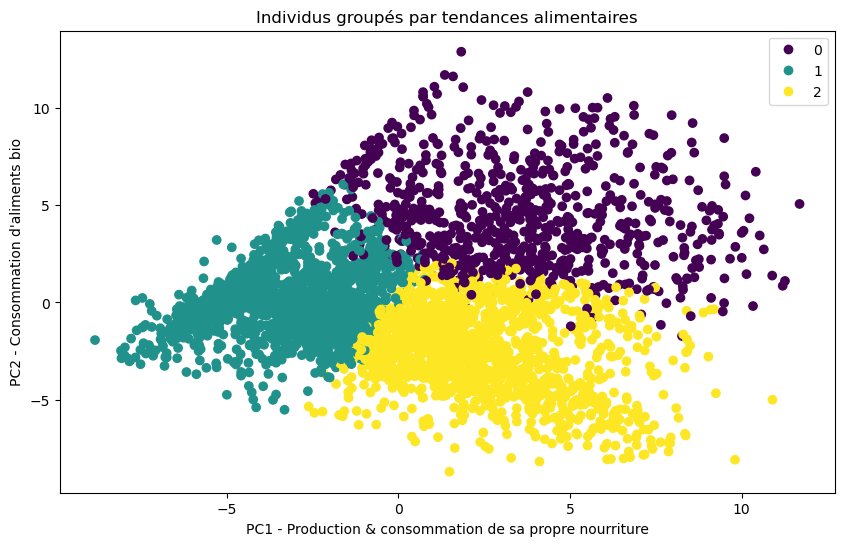

In [222]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par tendances alimentaires')
plt.xlabel('PC1 - Production & consommation de sa propre nourriture')
plt.ylabel('PC2 - Consommation d\'aliments bio')
plt.show()

### Clustering activité physique

In [223]:
actphys_sedent.shape

(4725, 93)

In [225]:
# Sélectionner les caractéristiques pour le clustering
actphys_sedent_for_clustering = actphys_sedent.drop(
    ['POPULATION', 'NOIND'],
    axis=1
).dropna(
    axis=1, how='all'
).select_dtypes(
    include=np.number
)
actphys_sedent_for_clustering.shape

(4725, 91)

In [226]:
# Gérer les valeurs manquantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
actphys_sedent_for_clustering_array = imputer.fit_transform(actphys_sedent_for_clustering)

In [227]:
# Normaliser les colonnes
scaler = StandardScaler()
actphys_sedent_for_clustering_array = scaler.fit_transform(actphys_sedent_for_clustering_array)

In [228]:
# Détecter et retirer les outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=0)
outlier_labels = outlier_detector.fit_predict(actphys_sedent_for_clustering_array)
actphys_sedent_for_clustering_array = actphys_sedent_for_clustering_array[outlier_labels == 1]
actphys_sedent_for_clustering_array.shape

(4488, 91)

In [241]:
# Effectuer le clustering par K-moyennes
k = 2  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(actphys_sedent_for_clustering_array)

/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [242]:
# Effectuer l'ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(actphys_sedent_for_clustering_array)

# Obtenir les poids des caractéristiques pour chaque composante principale
pca_components = pd.DataFrame(np.abs(pca.components_), columns=actphys_sedent_for_clustering.columns)

In [243]:
# Créer un dataframe pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

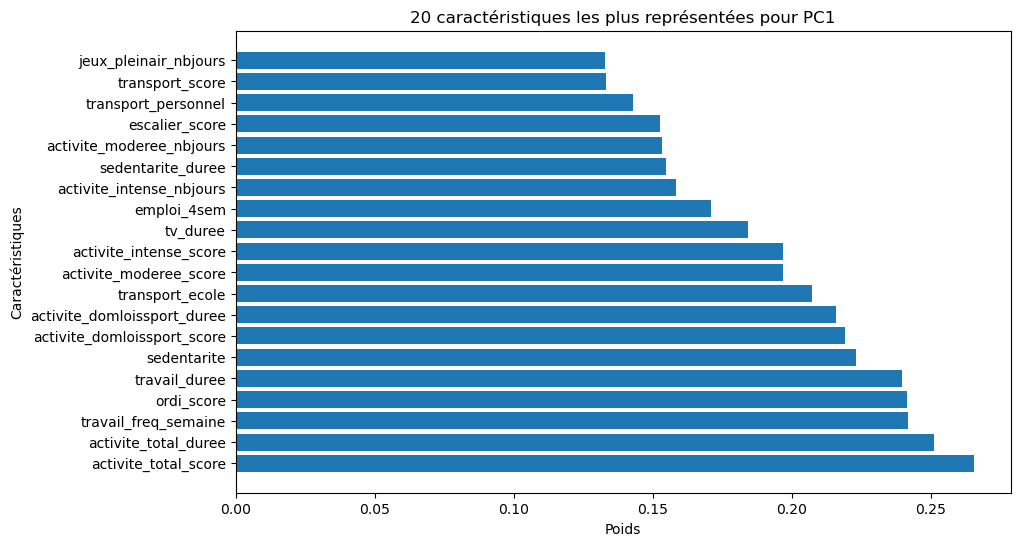

In [244]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC1
pc1_top_features = pca_components.iloc[0].nlargest(20)

# Afficher les poids des caractéristiques pour PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_top_features.index, pc1_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC1')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

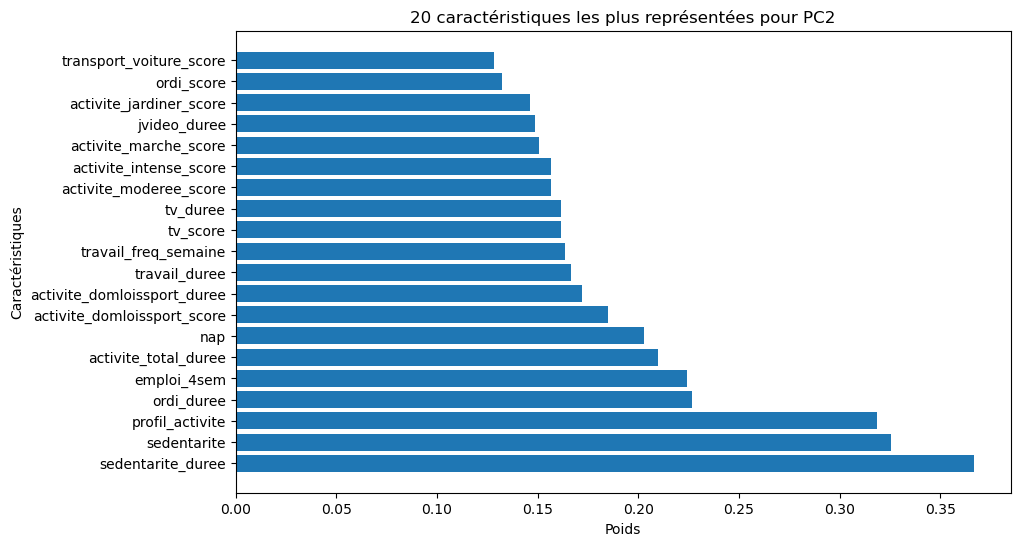

In [245]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC2
pc2_top_features = pca_components.iloc[1].nlargest(20)

# Afficher les poids des caractéristiques pour PC2
plt.figure(figsize=(10, 6))
plt.barh(pc2_top_features.index, pc2_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC2')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

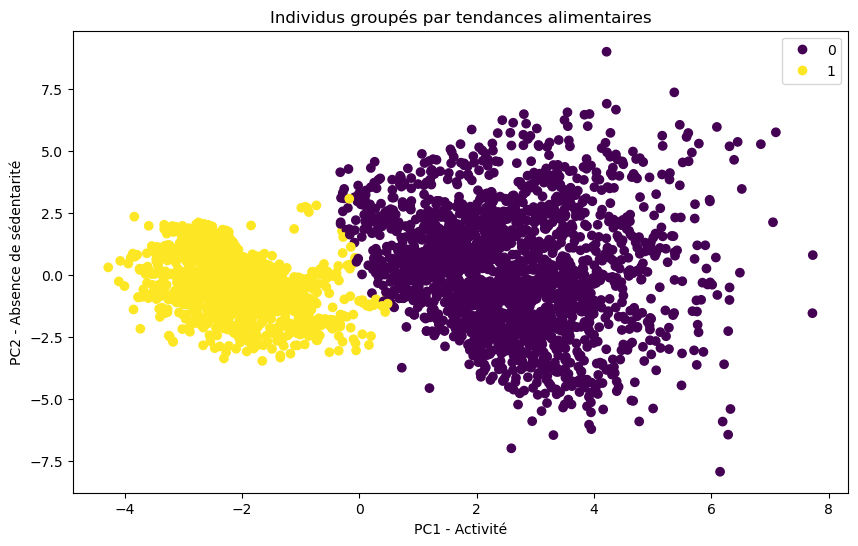

In [247]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par tendances alimentaires')
plt.xlabel('PC1 - Activité')
plt.ylabel('PC2 - Absence de sédentarité')
plt.show()

### Clustering fréquentiel alimentaire

In [248]:
fpq.shape

(4372, 389)

In [279]:
# Sélectionner les caractéristiques pour le clustering
fpq_for_clustering = fpq.drop(
    ['POPULATION', 'NOIND'],
    axis=1
).dropna(
    axis=1, how='all'
).select_dtypes(
    include=np.number
)
fpq_for_clustering.shape

(4339, 382)

In [280]:
# Gérer les valeurs manquantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
fpq_for_clustering_array = imputer.fit_transform(fpq_for_clustering)

In [281]:
# Normaliser les colonnes
scaler = StandardScaler()
fpq_for_clustering_array = scaler.fit_transform(fpq_for_clustering_array)

In [282]:
# Détecter et retirer les outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=0)
outlier_labels = outlier_detector.fit_predict(fpq_for_clustering_array)
fpq_for_clustering_array = fpq_for_clustering_array[outlier_labels == 1]
fpq_for_clustering_array.shape

(4122, 382)

In [295]:
# Effectuer le clustering par K-moyennes
k = 3  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(fpq_for_clustering_array)

/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [296]:
# Effectuer l'ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fpq_for_clustering_array)

# Obtenir les poids des caractéristiques pour chaque composante principale
pca_components = pd.DataFrame(np.abs(pca.components_), columns=fpq_for_clustering.columns)

In [297]:
# Créer un dataframe pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

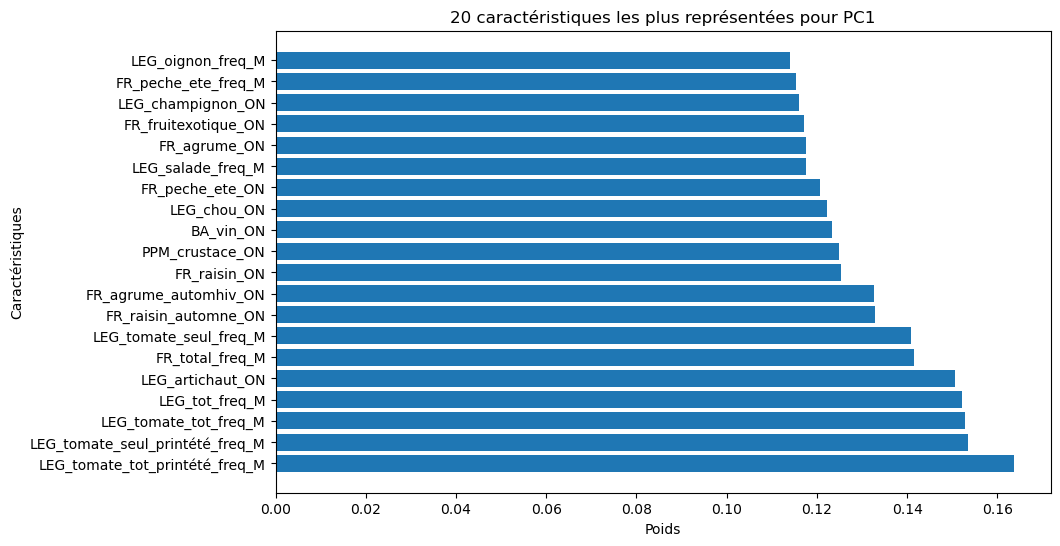

In [298]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC1
pc1_top_features = pca_components.iloc[0].nlargest(20)

# Afficher les poids des caractéristiques pour PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_top_features.index, pc1_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC1')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

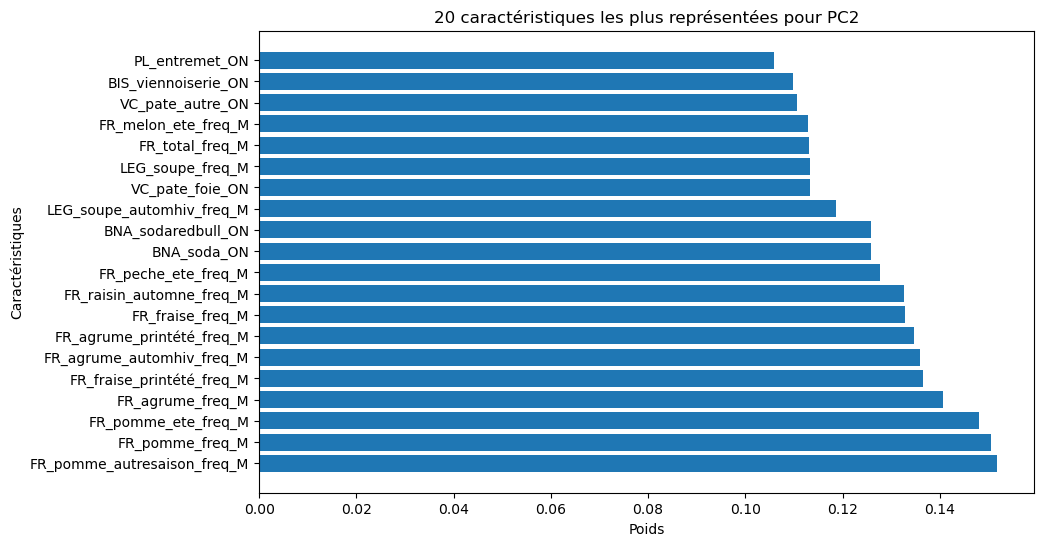

In [299]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC2
pc2_top_features = pca_components.iloc[1].nlargest(20)

# Afficher les poids des caractéristiques pour PC2
plt.figure(figsize=(10, 6))
plt.barh(pc2_top_features.index, pc2_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC2')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

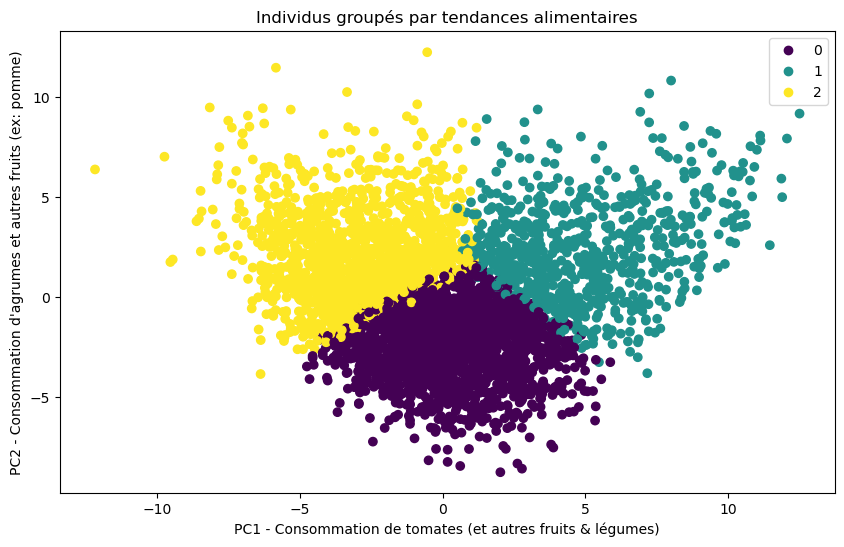

In [301]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par tendances alimentaires')
plt.xlabel('PC1 - Consommation de tomates (et autres fruits & légumes)')
plt.ylabel('PC2 - Consommation d\'agrumes et autres fruits (ex: pomme)')
plt.show()

### Autres analyses